## An치lisis - Serie A temporada 2015/2016 (masculina)

Vamos a hacer un an치lisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que caracter칤sticas son m치s importantes a la hora de tomar la decisi칩n por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuesti칩n, vamos a analizar la Serie A en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competici칩n para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Serie A"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_SerieA = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Serie A(2015_2016_male)_reduced.csv


In [2]:
matches_in_SerieA.head(5)

match_id  shots_on_target_ratio_home  shots_on_target_ratio_away  \
0   3878548                    0.285714                    0.285714   
1   3878541                    0.583333                    0.285714   
2   3878549                    0.250000                    0.250000   
3   3878547                    0.230769                    0.230769   
4   3878546                    0.352941                    0.266667   

   average_shots_on_target_distance_home  \
0                              16.182880   
1                              16.798535   
2                              17.663252   
3                              25.183344   
4                              14.242283   

   average_shots_on_target_distance_away  shots_inside_area_ratio_home  \
0                              10.093019                      0.619048   
1                              18.598700                      0.750000   
2                              13.275137                      0.687500   
3                              15.573483                      0.384615   
4                              16.442821                      0.705882   

   shots_inside_area_ratio_away  pass_success_ratio_home  \
0                      0.857143                 0.795717   
1                      0.523810                 0.656667   
2                      0.750000                 0.792727   
3                      0.538462                 0.741514   
4                      0.666667                 0.707143   

   pass_success_ratio_away  cross_success_ratio_home  ...  \
0                 0.653614                  0.407407  ...   
1                 0.851100                  0.111111  ...   
2                 0.698824                  0.214286  ...   
3                 0.785714                  0.222222  ...   
4                 0.786885                  0.214286  ...   

   percentage_shots_under_pressure_home  \
0                              0.900000   
1                              0.500000   
2                              0.666667   
3                              0.285714   
4                              0.400000   

   percentage_shots_inside_area_under_pressure_home  \
0                                          0.888889   
1                                          0.571429   
2                                          0.800000   
3                                          0.400000   
4                                          0.444444   

   percentage_passes_under_pressure_home  \
0                               0.495238   
1                               0.478992   
2                               0.470588   
3                               0.564885   
4                               0.315476   

   percentage_passes_inside_area_under_pressure_home  \
0                                           0.750000   
1                                           0.600000   
2                                           0.333333   
3                                           0.200000   
4                                           0.333333   

   percentage_set_piece_shots_home  \
0                         0.750000   
1                         0.315789   
2                         0.588235   
3                         0.280000   
4                         0.631579   

   percentage_set_piece_shots_inside_area_home  percentage_substitutions_home  \
0                                     0.642857                            0.5   
1                                     0.312500                            0.5   
2                                     0.500000                            0.5   
3                                     0.307692                            0.5   
4                                     0.666667                            0.5   

   percentage_tactical_substitutions_home  percentage_tactical_changes_home  \
0                                     0.6                               0.5   
1                                     0.4                               

Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentaci칩n) y mostramos sus resultados.

In [3]:
from src.analysis import serieA_best_model


best_model_SerieA, evaluation_metrics, X_train_reduced_SerieA, X_test_reduced_SerieA, X_test_reduced_orig_SerieA, feature_names_reduced_SerieA, encoder_SerieA, match_ids_test = serieA_best_model(matches_in_SerieA)
print(f"The best model for La Liga is {best_model_SerieA}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for La Liga is LogisticRegression(C=0.9319903015590866, l1_ratio=0.3035119926400068,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')
The evaluation metrics for the best model are:


Train Accuracy  Test Accuracy  Precision Macro  \
Logistic Regression MI        0.799342       0.618421         0.574374   

                        Precision Weighted  Recall Macro  Recall Weighted  \
Logistic Regression MI            0.611448      0.565664         0.618421   

                        F1 Macro  F1 Weighted  
Logistic Regression MI  0.567402     0.612269

Una vez ya tenemos el mejor modelo entrenado comenzamos el an치lisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Logistic Regression, vamos a fijarnos en el coeficiente (m칠todo coef_) que nos aporta el modelo para cada caracter칤stica en cada clase. 
- Con esto, estamos observando la importancia global de cada caracter칤stica para cada clase en t칠rminos de una relaci칩n lineal. Es decir, estamos observando relaciones exclusivamente lineales entre las caracter칤sticas y la predicci칩n.
- Con esto, no se tiene en cuenta las interacciones entre caracter칤sticas ni tampoco explica predicciones individuales.

Los gr치ficos que se aparecen a continuaci칩n muestran la importancia de cada caracter칤stica para predecir una determinada clase de resultado en los partidos de la Serie A. Las clases son:
- Clase "away_team": Indica qu칠 caracter칤sticas influyen en que el equipo visitante gane el partido.
- Clase "draw": Indica qu칠 caracter칤sticas influyen en que el partido termine en empate.
- Clase "home_team": Indica qu칠 caracter칤sticas influyen en que el equipo local gane el partido.

Los valores representados en el eje X son los coeficientes de la regresi칩n log칤stica, que indican la magnitud e impacto de cada variable en la probabilidad de un resultado espec칤fico. Valores positivos aumentan la probabilidad de que ocurra esa clase, mientras que valores negativos disminuyen dicha probabilidad.

Class 0: ['away_team']
Features with zero importance for class away_team:
['dribbles_success_ratio_away', 'last_3_matches_form_away', 'percentage_total_shots_home', 'percentage_shots_foot_home', 'percentage_total_passes_home', 'percentage_duels_won_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_players_off_home', 'percentage_set_piece_shots_home', 'percentage_tactical_substitutions_home']


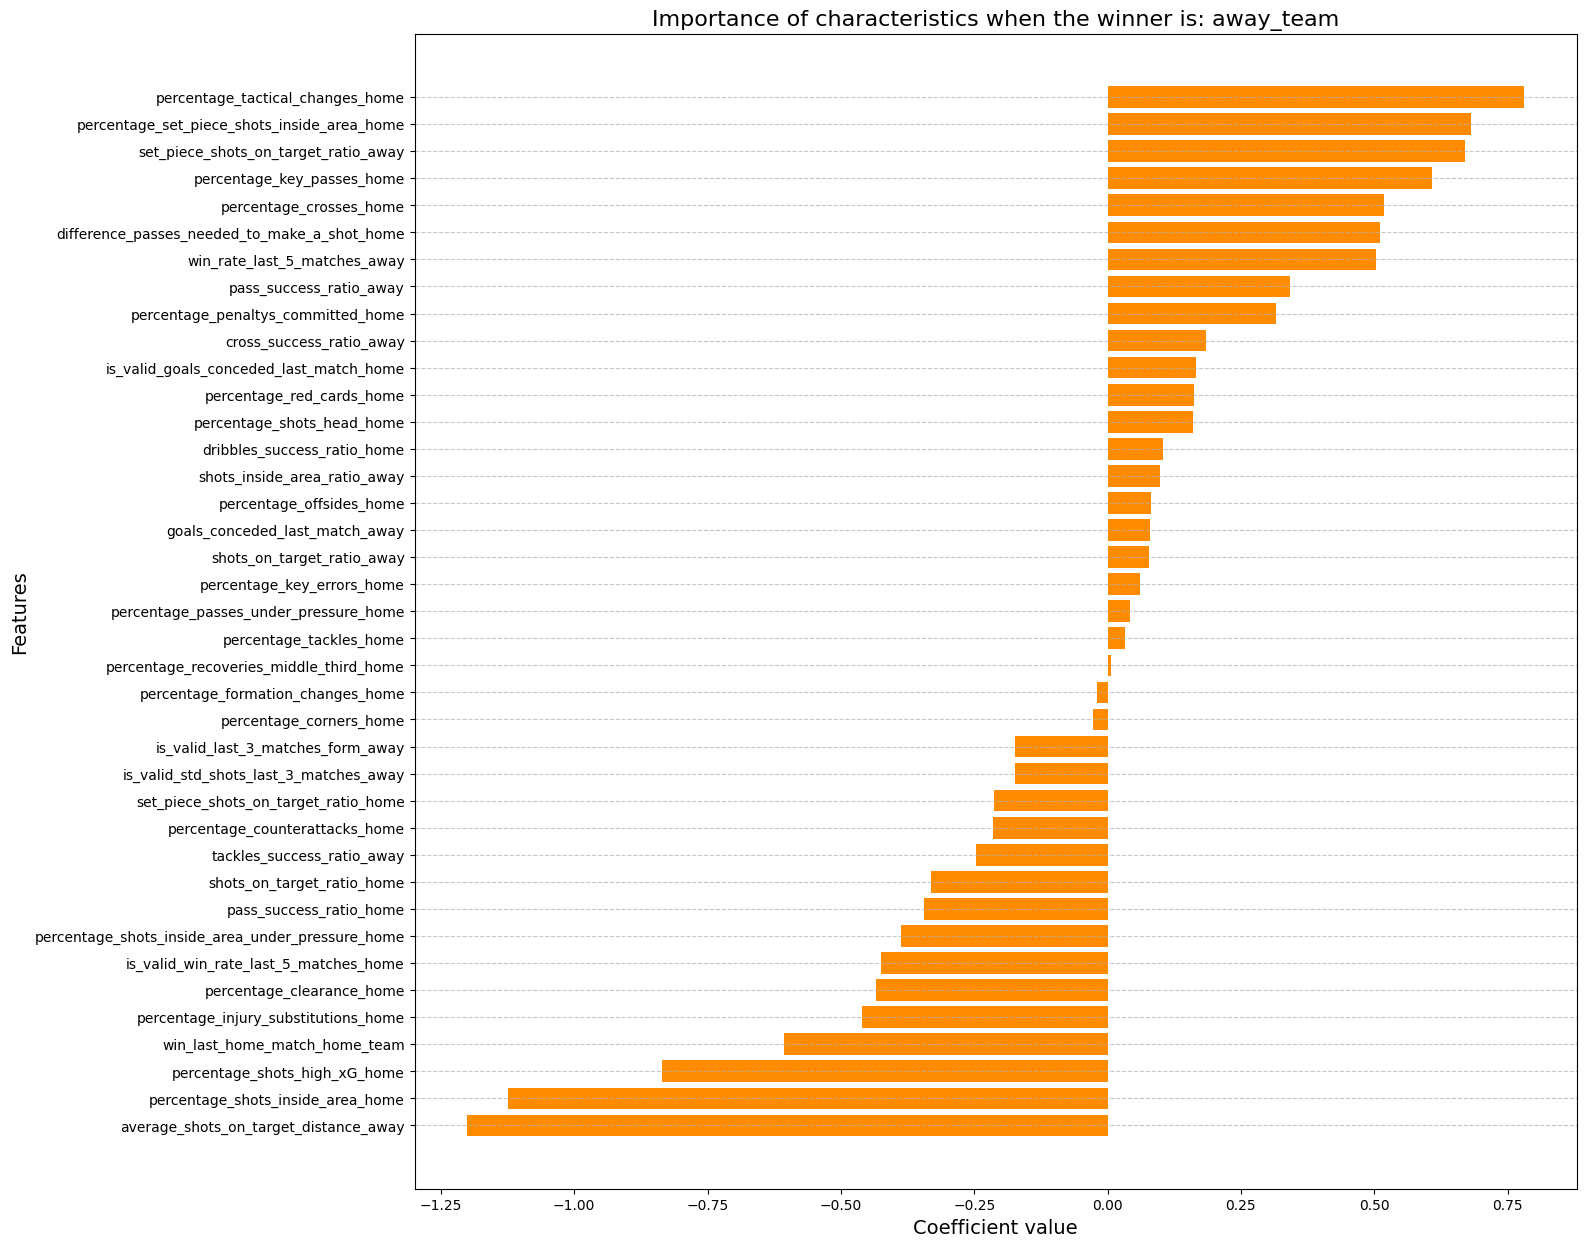

Class 1: ['draw']
Features with zero importance for class draw:
['shots_on_target_ratio_home', 'pass_success_ratio_home', 'set_piece_shots_on_target_ratio_home', 'is_valid_win_rate_last_5_matches_home', 'win_last_home_match_home_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'percentage_total_shots_home', 'percentage_shots_high_xG_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_yellow_cards_home', 'percentage_counterpress_home', 'percentage_offsides_home', 'percentage_players_off_home', 'percentage_counterattacks_home', 'percentage_shots_inside_area_under_pressure_home', 'percentage_set_piece_shots_home']


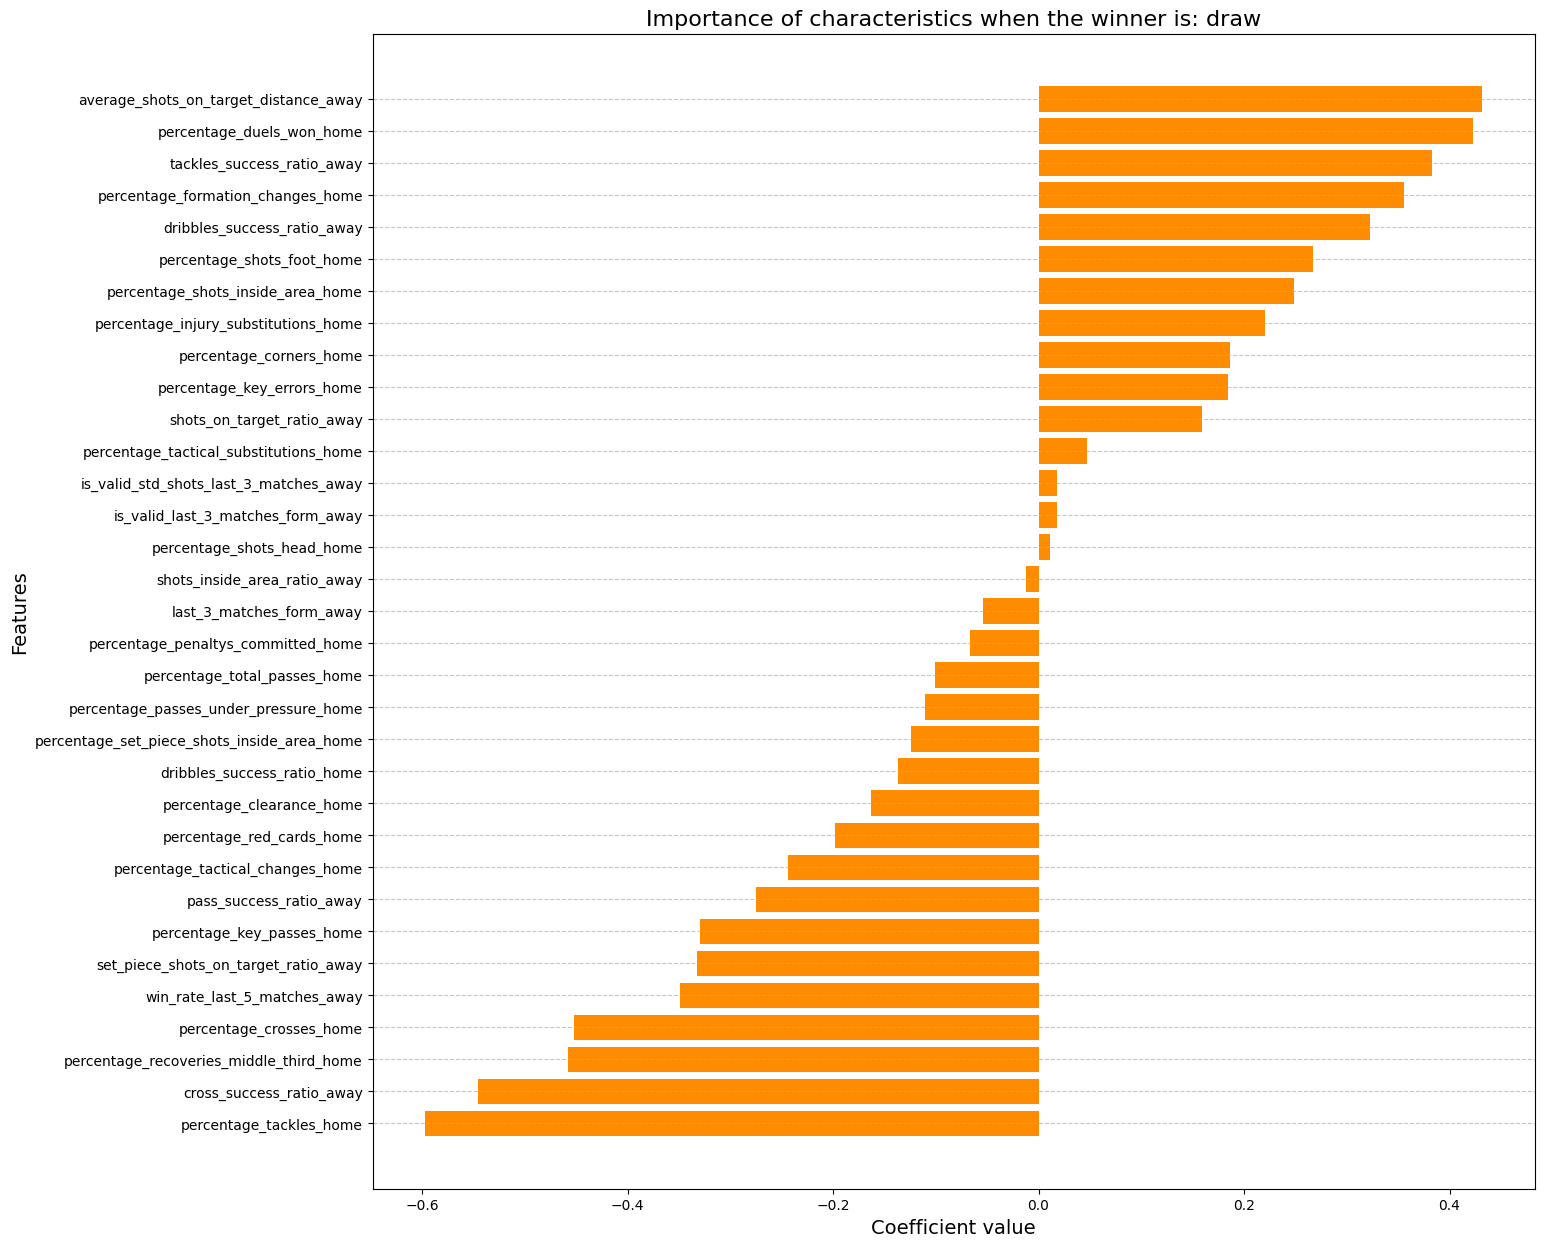

Class 2: ['home_team']
Features with zero importance for class home_team:
['shots_inside_area_ratio_away', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'is_valid_last_3_matches_form_away', 'win_rate_last_5_matches_away', 'is_valid_std_shots_last_3_matches_away', 'percentage_total_shots_home', 'percentage_key_passes_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_penaltys_committed_home', 'percentage_red_cards_home', 'percentage_injury_substitutions_home', 'percentage_players_off_home', 'percentage_passes_under_pressure_home', 'percentage_formation_changes_home']


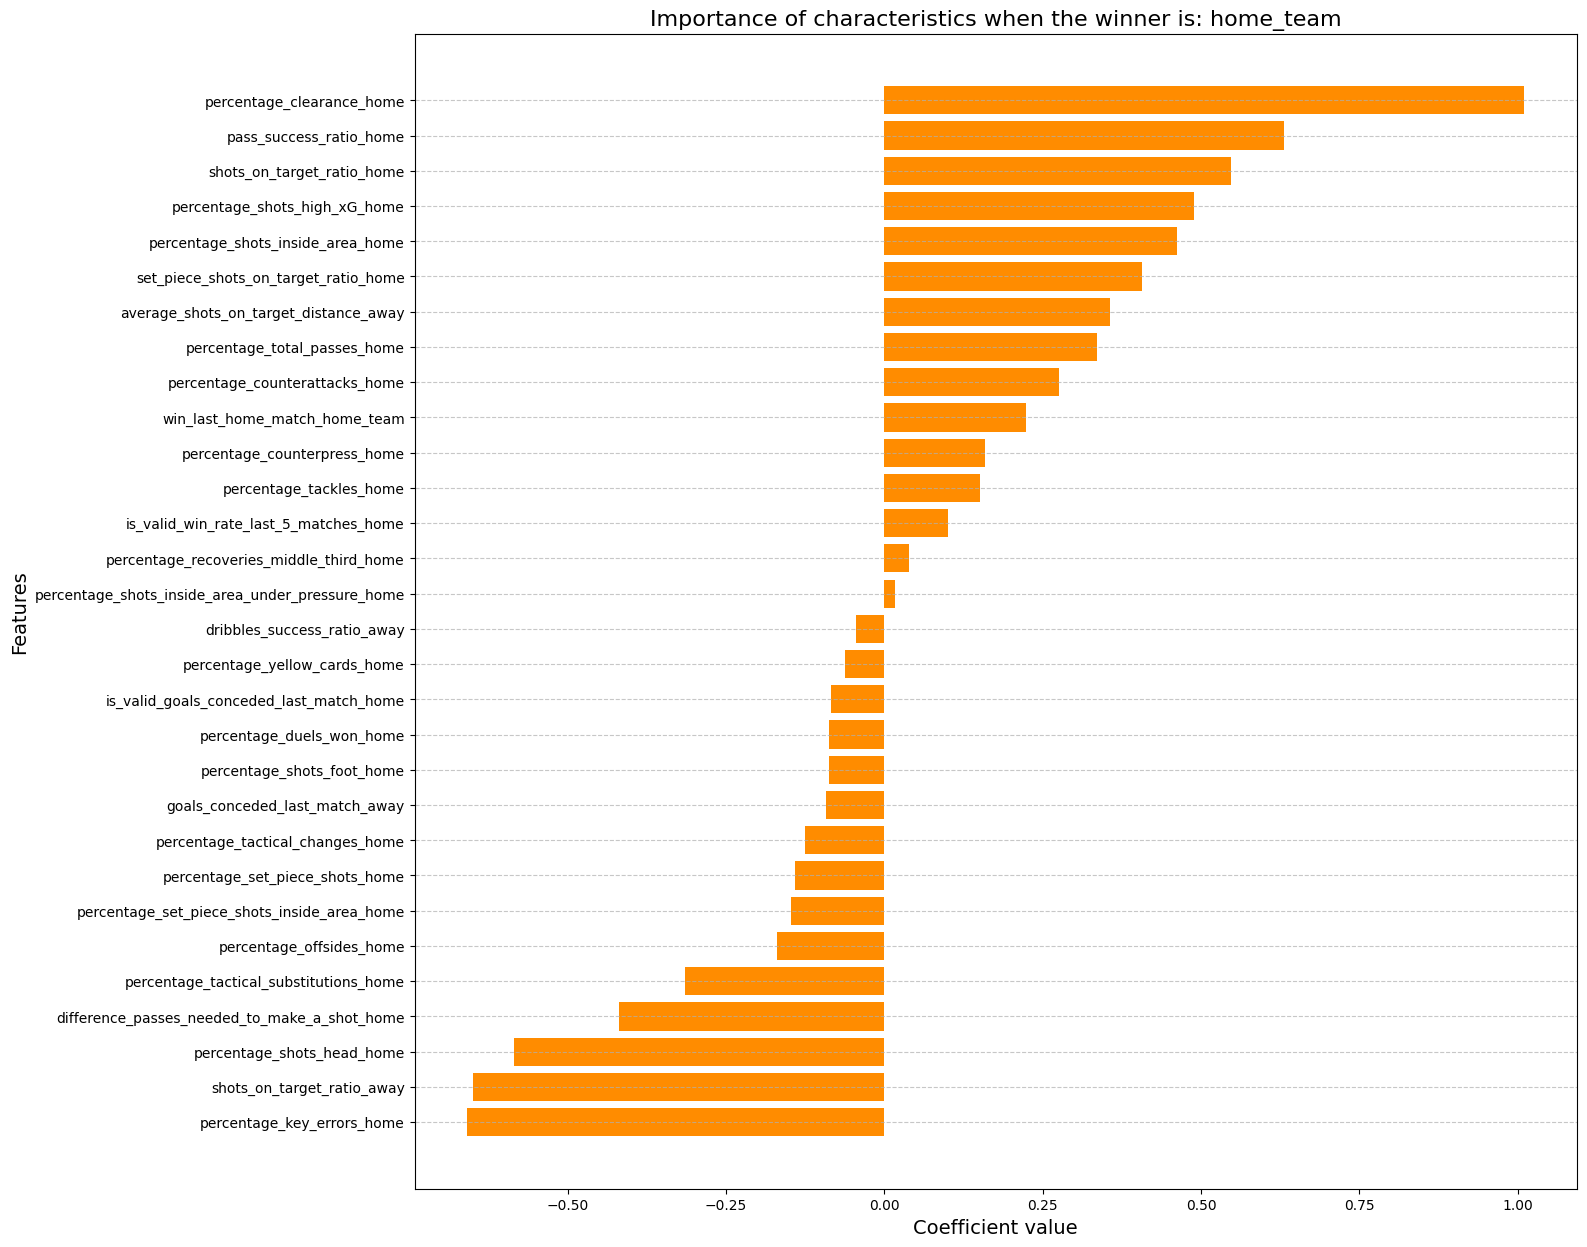

In [4]:
from src.analysis import logistic_regression_global_analysis

logistic_regression_global_analysis(best_model_SerieA, feature_names_reduced_SerieA, encoder_SerieA)

Vamos a analizar estos gr치ficos:

- **Importancia de caracter칤sticas para la victoria del equipo visitante (*away_team*)**: Las caracter칤sticas en este gr치fico aumentan la probabilidad de que el equipo visitante gane el partido.
    - **Caracter칤sticas que favorecen la victoria del equipo visitante**: 游늳
        - `percentage_tactical_changes_home`: Un mayor n칰mero de cambios t치cticos del equipo local sugiere inestabilidad en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_set_piece_shots_inside_area_home`: Puede indicar que el equipo local depende de tiros dentro del 치rea de jugadas a bal칩n parado, lo que puede significar menor efectividad en ataque.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta en jugadas a bal칩n parado, incrementa su probabilidad de marcar.
        - `percentage_key_passes_home`: Un alto porcentaje de pases clave en el equipo local puede indicar que generan oportunidades, pero si no se concretan, podr칤a reflejar inefectividad ofensiva.
        - `percentage_crosses_home`: Un alto n칰mero de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego a칠reo, lo que puede ser m치s predecible y menos efectivo contra una defensa bien organizada.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases para generar un disparo, su ataque es menos directo y puede ser menos eficiente.
        - `win_rate_last_5_matches_away`: Un equipo visitante con una buena racha en los 칰ltimos cinco partidos llega con confianza y ritmo competitivo, lo que incrementa su probabilidad de ganar.
        - `pass_success_ratio_away`: Un alto porcentaje de precisi칩n en los pases del equipo visitante le permite mantener la posesi칩n y controlar el ritmo del partido.
        - `percentage_penaltys_committed_home`: Un mayor n칰mero de penaltis cometidos por el equipo local puede significar oportunidades claras de gol para el visitante.
        - `cross_success_ratio_away`: Un alto porcentaje de centros exitosos por parte del equipo visitante les permite generar ocasiones de gol efectivas.
        - `percentage_red_cards_home`: Si el equipo local recibe m치s tarjetas rojas que el equipo visitante, juega en inferioridad num칠rica, lo que favorece al visitante.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a칠reo, lo que puede ser m치s predecible y menos efectivo.
        - `shots_inside_area_ratio_away`: Si un alto ratio de los tiros del equipo visitante es desde dentro del 치rea tienen m치s opciones de llevarse el partido.
        - `shots_on_target_ratio_away`: Si un alto ratio de los tiros del equipo visitante van a puerta tienen m치s opciones de llevarse el partido.
        - `percentage_key_errors_home`: Un equipo local con un mayor n칰mero de errores graves que el visitante, da m치s facilidades de llevarse el partido al equipo visitante.
        - `percentage_passes_under_pressure_home`: Un equipo local que realiza m치s pases bajo presi칩n que el equipo visitante hace que aumenten las opciones de ganar el partido por parte del equipo visitante.
    - **Caracter칤sticas que no favorecen la victoria del equipo visitante**: 游늴
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen, ya que estos disparos suelen ser menos peligrosos.
        - `percentage_shots_inside_area_home`: Si el equipo local consigue realizar m치s tiros dentro del 치rea, sus oportunidades de marcar aumentan, reduciendo la posibilidad de victoria visitante.
        - `percentage_shots_high_xG_home`: Si el equipo local genera tiros con una alta expectativa de gol (xG), es m치s probable que convierta sus oportunidades.
        - `win_last_home_match_home_team`: Si el equipo local gan칩 su 칰ltimo partido en casa, es probable que llegue con confianza y con un buen rendimiento reciente. Adem치s de que puede deberse a que es un equipo que concede pocas opciones de ganar a los rivales en casa.
        - `percentage_clearance_home`: Si el equipo local realiza muchos despejes efectivos, su defensa puede estar resolviendo bien las amenazas del visitante.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera m치s peligro y dificulta la victoria del visitante.
        - `pass_sucess_ratio_home`: Un alto ratio de pases acertados por parte del equipo local hace que aumenten sus opciones de ganar el partido.
        - `percentage_counterattacks_home`: Un mayor n칰mero de contraataques por parte del equipo local respecto al visitante hace que disminuyan las opciones de ganar el partido por parte del equipo visitante.
    - **Caracter칤sticas que no tienen importancia en la victoria del equipo visitante**:
        - `percentage_yellow_cards_home`: El n칰mero de tarjetas amarillas del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
        - `percentage_total_shots_home`, `percentage_shots_foot_home`: El n칰mero de tiros y tiros con el pie del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
        - `percentage_duels_won_home`: El n칰mero de duelos ganados del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
        - `percentage_tackles_home`: El n칰mero de entradas del equipo local respecto al total del partido (ambos equipos) no parece influir en la victoria del equipo visitante.
    - **Conclusi칩n**: Para que un equipo visitante tenga mayores probabilidades de ganar un partido en la Serie A, es fundamental que aproveche errores t치cticos y defensivos del equipo local, como un alto n칰mero de cambios estrat칠gicos, pases bajo presi칩n y errores clave en la circulaci칩n del bal칩n. Adem치s, factores como una alta efectividad en tiros a puerta y dentro del 치rea, un buen desempe침o en jugadas a bal칩n parado y un alto porcentaje de precisi칩n en los pases permiten al visitante controlar el ritmo del partido y generar oportunidades de gol. Tambi칠n, si el equipo local depende excesivamente del juego a칠reo o de centros al 치rea, su ataque puede volverse predecible, lo que favorece a un visitante con una defensa bien organizada. Sin embargo, hay factores que pueden dificultar la victoria del equipo visitante, como un equipo local que realiza m치s tiros dentro del 치rea con un alto valor de xG, un elevado porcentaje de pases exitosos y una defensa s칩lida que realiza despejes efectivos. Adem치s, si el equipo local gan칩 su 칰ltimo partido en casa, es posible que tenga confianza y sea dif칤cil de vencer en su estadio. Por otro lado, m칠tricas como el n칰mero de tarjetas amarillas, la cantidad total de tiros y ciertos duelos defensivos del equipo local no parecen tener un impacto determinante en la victoria del equipo visitante.

- **Importancia de caracter칤sticas para el empate (*draw*)**: El empate en un partido suele estar influenciado por un equilibrio en las m칠tricas de ataque y defensa de ambos equipos. Algunas observaciones clave:
    - **Caracter칤sticas que favorecen el empate**: 游늳
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen, favoreciendo un resultado m치s ajustado.
        - `percentage_duels_won_home`: Un equipo local que gana una gran cantidad de duelos hace que el partido sea m치s disputado, reduciendo la posibilidad de que un equipo imponga su dominio.
        - `tackles_success_ratio_away`: Un alto porcentaje de entradas exitosas del equipo visitante sugiere un partido con menos transiciones r치pidas y menos ocasiones de gol.
        - `percentage_formation_changes_home`: Un mayor n칰mero de cambios t치cticos en el equipo local indica que el partido es din치mico y ajustado, lo que favorece un empate.
        - `dribbles_success_ratio_away`: Un equipo visitante con un alto porcentaje de regates exitosos puede mantener la posesi칩n y evitar que el equipo local imponga su ritmo.
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie del equipo local sugiere una tendencia a buscar opciones de disparo sin llegar a concretar una diferencia en el marcador.
        - `percentage_shots_inside_area_home`: Si el equipo local realiza m치s tiros dentro del 치rea pero no logra convertir en goles, el partido puede terminar en empate.
        - `percentage_injury_substitutions_home`: Si el equipo local realiza sustituciones por lesi칩n, podr칤a afectar su rendimiento sin que esto derive en un resultado favorable para alguno de los equipos.
        - `percentage_corners_home`: Un mayor n칰mero de c칩rners del equipo local puede indicar presi칩n ofensiva, pero sin necesariamente traducirse en goles que rompan el empate.
        - `percentage_key_errors_home`: Si el equipo local comete errores clave pero el visitante no logra aprovecharlos, el marcador se mantiene igualado.
        - `shots_on_target_ratio_away`: Un equipo visitante con un porcentaje de tiros a puerta moderado pero sin concretar los goles suficientes para ganar favorece el empate.
        - `percentage_tactical_substitutions_home`: Un equipo local que realiza cambios t치cticos puede estar buscando equilibrar el partido, lo que favorece el empate.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a칠reo, lo que hace que el marcador se mantenga igualado.
    - **Caracter칤sticas que no favorecen el empate**: 游늴
        - `percentage_tackles_home`: Un equipo local que realiza muchas entradas puede estar tratando de recuperar la posesi칩n y controlar el partido, disminuyendo las posibilidades de empate.
        - `cross_success_ratio_away`: Un alto porcentaje de centros exitosos del equipo visitante sugiere que est치n generando oportunidades claras, aumentando sus posibilidades de victoria.
        - `percentage_recoveries_middle_third_home`: Un alto n칰mero de recuperaciones en el medio campo del equipo local indica que est치n dominando la zona central y reduciendo las opciones del visitante.
        - `percentage_crosses_home`: Un alto n칰mero de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego a칠reo, lo que puede ser m치s predecible y menos efectivo contra una defensa bien organizada.
        - `percentage_tactical_changes_home`: Un mayor n칰mero de cambios t치cticos del equipo local sugiere inestabilidad en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_red_cards_home`: Si el equipo local recibe tarjetas rojas, el visitante tiene una mayor probabilidad de aprovechar la superioridad num칠rica y llevarse la victoria.
        - `dribbles_success_ratio_home`: Un equipo local con un alto porcentaje de regates exitosos puede estar generando m치s oportunidades, reduciendo la posibilidad de un empate.
        - `percentage_clearance_home`: Un alto n칰mero de despejes del equipo local puede significar que est치n defendiendo con intensidad y buscando mantener una ventaja.
        - `percentage_passes_under_pressure_home`: Un equipo local que juega bajo presi칩n puede cometer errores que favorezcan al equipo visitante y rompan el empate.
        - `percentage_total_passes_home`: Un mayor n칰mero de pases del equipo local puede significar que est치n dominando el juego y reduciendo las oportunidades del rival.
        - `percentage_penaltys_committed_home`: Si el equipo local comete penaltis, el visitante tiene oportunidades claras de anotar y romper el empate.
        - `win_rate_last_5_matches_away`, `last_3_matches_form_away`: Si el equipo visitante llega en buena forma en los 칰ltimos partidos, es m치s probable que logre una victoria.
        - `shots_inside_area_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros dentro del 치rea, sus oportunidades de marcar aumentan, reduciendo la posibilidad de un empate.
    - **Caracter칤sticas que no tienen importancia en el empate**:
       - `shots_on_target_ratio_home`, `set_piece_shots_on_target_ratio_home`, `percentage_total_shots_home`, `percentage_shots_high_xG_home`, `percentage_set_piece_shots_home`: algunas m칠tricas acerca de los disparos no parecen influir en el empate.
       - `win_last_home_match_home_team`, `goals_conceded_last_match_away`: algunas m칠tricas temporales no parecen influir en el empate
       - `difference_passes_needed_to_make_a_shot_home`, `percentage_counterpress_home`, `percentage_counterattacks_home`: algunas m칠tricas que reflejan el estilo de juego de los equipos no parecen influir en el empate.
       - `percentage_yellow_cards_home`: El n칰mero de tarjetas amarillas del equipo local respecto al total del partido (ambos equipos) no parece influir en el empate.
    - **Conclusi칩n**: El empate en un partido suele ser el resultado de un equilibrio entre las m칠tricas ofensivas y defensivas de ambos equipos, donde ninguno logra imponer una clara superioridad. Factores que favorecen el empate incluyen tiros lejanos del equipo visitante, lo que reduce la efectividad ofensiva, y un alto n칰mero de duelos ganados por el equipo local, lo que indica un partido disputado y trabado. Adem치s, la alta cantidad de regates exitosos del visitante, combinada con cambios t치cticos del equipo local, sugiere un encuentro din치mico sin un claro dominador. Tambi칠n, la falta de eficacia en tiros dentro del 치rea por parte del equipo local, sumado a errores clave que el visitante no logra aprovechar, contribuye a mantener el marcador equilibrado. Sin embargo, el empate se vuelve menos probable si el equipo local domina el centro del campo con recuperaciones efectivas o si el visitante genera oportunidades claras a trav칠s de centros exitosos y tiros dentro del 치rea. Asimismo, factores como la cantidad de pases totales del equipo local, el n칰mero de penaltis cometidos o la buena forma reciente del equipo visitante pueden inclinar la balanza hacia un ganador. Por otro lado, m칠tricas como las tarjetas amarillas, ciertos estilos de juego y algunas estad칤sticas de disparos no parecen ser determinantes para el empate.

- **Importancia de caracter칤sticas para la victoria del equipo local (*home_team*)**: Las caracter칤sticas en este gr치fico aumentan la probabilidad de que el equipo local gane el partido.
    - **Caracter칤sticas que favorecen la victoria del equipo local**: 游늳
        - `percentage_clearance_home`: Un alto porcentaje de despejes exitosos del equipo local indica una defensa s칩lida, reduciendo las oportunidades de gol del rival.
        - `pass_success_ratio_home`: Un equipo local con una alta precisi칩n en los pases puede controlar mejor el ritmo del partido y generar m치s oportunidades.
        - `shots_on_target_ratio_home`: Un mayor porcentaje de tiros a puerta del equipo local incrementa su probabilidad de marcar y ganar el partido.
        - `percentage_shots_high_xG_home`: Si el equipo local genera m치s tiros con una alta expectativa de gol (xG), es m치s probable que convierta sus oportunidades.
        - `percentage_shots_inside_area_home`: Un equipo local que realiza un alto porcentaje de tiros dentro del 치rea suele generar m치s peligro y aumentar su probabilidad de anotar.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local tiene una alta efectividad en tiros a puerta desde jugadas a bal칩n parado, incrementa sus opciones de victoria.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros desde una mayor distancia, su efectividad de cara al gol disminuye, favoreciendo la victoria local.
        - `percentage_total_passes_home`: Un equipo local con un alto n칰mero de pases puede estar dominando la posesi칩n y el ritmo del partido, lo que le da m치s control.
        - `percentage_counterattacks_home`: Un equipo local que genera m치s contraataques puede aprovechar los espacios dejados por el rival y aumentar sus posibilidades de marcar.
        - `win_last_home_match_home_team`: Si el equipo local gan칩 su 칰ltimo partido en casa, es probable que llegue con confianza y mantenga un buen rendimiento en su estadio.
        - `percentage_counterpress_home`: Un equipo local que ejerce presi칩n tras la p칠rdida del bal칩n puede dificultar la salida del rival y recuperar la posesi칩n r치pidamente.
        - `percentage_tackles_home`: Un equipo local que realiza una gran cantidad de entradas puede estar demostrando agresividad defensiva, evitando que el equipo visitante desarrolle su juego.
        - `percentage_recoveries_middle_third_home`: Un equipo local que recupera el bal칩n en el tercio medio del campo puede cortar los ataques del rival y mantener el control del partido.
    - **Caracter칤sticas que no favorecen la victoria del equipo local**: 游늴
        - `percentage_key_errors_home`: Si el equipo local comete errores clave en el partido, puede facilitar oportunidades al equipo visitante y reducir sus opciones de victoria.
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta genera m치s peligro, lo que dificulta la victoria del equipo local.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente del juego a칠reo, lo que podr칤a ser menos efectivo.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases para generar un disparo, su ataque es menos eficiente y m치s predecible.
        - `percentage_tactical_substitutions_home`: Un alto n칰mero de sustituciones t치cticas del equipo local podr칤a indicar que est치n intentando corregir problemas en su estrategia, lo que podr칤a reflejar dificultades en el partido.
        - `percentage_offsides_home`: Si el equipo local cae en fuera de juego con frecuencia, puede estar teniendo dificultades para romper la defensa rival de manera efectiva.
        - `percentage_set_piece_shots_inside_area_home`: Si el equipo local genera muchos tiros en jugadas a bal칩n parado dentro del 치rea pero no es efectivo, puede desperdiciar oportunidades clave.
        - `percentage_set_piece_shots_home`: Si el equipo local depende demasiado de los tiros a bal칩n parado, podr칤a tener dificultades para generar ocasiones en jugadas de campo abierto.
        - `percentage_tactical_changes_home`: Un alto n칰mero de cambios t치cticos en el equipo local puede reflejar inestabilidad en su planteamiento y afectar su rendimiento.
        - `goals_conceded_last_match_away`: Si el equipo visitante concedi칩 pocos goles en su 칰ltimo partido, puede significar que tiene una defensa s칩lida, lo que dificulta la victoria local.
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie del equipo local no parece estar directamente relacionado con una mayor efectividad en la victoria.
        - `percentage_duels_won_home`: Un equipo local que gana m치s duelos individuales no garantiza que traduzca esta ventaja en una victoria.
        - `percentage_yellow_cards_home`: Un mayor n칰mero de tarjetas amarillas para el equipo local parece hacer disminuir la probabilidad de victoria del equipo local.
    - **Caracter칤sticas que no tienen importancia en la victoria del equipo local**:
        - `shots_inside_area_ratio_away`, `pass_success_ratio_away`, `cross_success_ratio_away`, `tackles_success_ratio_away`, `set_piece_shots_on_target_ratio_away`: M칠tricas relacionadas con el desempe침o del equipo visitante que no parecen influir en la victoria local.
        - `dribbles_success_ratio_home`, `percentage_key_passes_home`: Indicadores ofensivos del equipo local que no muestran una correlaci칩n clara con su victoria.
        - `percentage_corners_home`, `percentage_penaltys_committed_home`, `percentage_red_cards_home`, `percentage_injury_substitutions_home`: Factores de juego y disciplina que no parecen influir en el resultado final.
        - `percentage_players_off_home`, `percentage_passes_under_pressure_home`, `percentage_formation_changes_home`: M칠tricas de juego que no muestran un impacto claro en la victoria del equipo local.
        - `win_rate_last_5_matches_away`, `last_3_matches_form_away`: La forma reciente del equipo visitante no parece ser determinante en la victoria del equipo local.
    - **Conclusi칩n**: La victoria del equipo local en la Serie A est치 fuertemente influenciada por su solidez defensiva, precisi칩n en los pases y capacidad para generar y concretar oportunidades de alta calidad en ataque. Un equipo local con un alto porcentaje de despejes efectivos, buena precisi칩n en los pases y dominio de la posesi칩n tiene mayores probabilidades de controlar el ritmo del partido y limitar las oportunidades del equipo visitante. Adem치s, un alto porcentaje de tiros a puerta y disparos dentro del 치rea con alta expectativa de gol (xG) favorecen el 칠xito ofensivo del equipo local. Estrategias como el contraataque efectivo y la presi칩n tras p칠rdida tambi칠n juegan un papel clave en mantener la iniciativa y forzar errores del rival. Sin embargo, la victoria del equipo local se ve comprometida si comete errores clave, si el equipo visitante tiene una alta precisi칩n en los tiros a puerta o si el equipo local depende en exceso del juego a칠reo sin ser efectivo. Asimismo, factores como las sustituciones t치cticas frecuentes, los fueras de juego y la inestabilidad t치ctica pueden indicar problemas en el planteamiento del partido, reduciendo las probabilidades de victoria. Por otro lado, m칠tricas como la forma reciente del equipo visitante, la cantidad de tarjetas rojas y ciertos aspectos del juego no parecen tener un impacto determinante en el resultado.

- **Conclusiones generales**: 
    - *Victoria del equipo visitante*: Para que un equipo visitante tenga m치s probabilidades de ganar, es crucial que aproveche los errores t치cticos y defensivos del equipo local, como cambios frecuentes en la estrategia, pases bajo presi칩n y errores clave en la circulaci칩n del bal칩n. Adem치s, un alto porcentaje de tiros a puerta y dentro del 치rea, una buena efectividad en jugadas a bal칩n parado y una alta precisi칩n en los pases favorecen su dominio del juego.
    Tambi칠n se beneficia cuando el equipo local depende excesivamente del juego a칠reo y los centros, lo que puede ser m치s predecible y f치cil de defender. Sin embargo, la victoria visitante se vuelve m치s dif칤cil si el equipo local tiene una defensa s칩lida, realiza despejes efectivos y genera tiros de alta calidad con un alto xG.
    - *Empate*: El empate suele darse en partidos equilibrados, donde ning칰n equipo logra imponerse con claridad. Un alto n칰mero de duelos ganados, regates exitosos y cambios t치cticos del equipo local y visitante indican un partido disputado y din치mico. Adem치s, si el equipo visitante realiza tiros lejanos, su efectividad disminuye, favoreciendo un marcador igualado. 
    El empate se vuelve menos probable si uno de los equipos domina el centro del campo con recuperaciones efectivas, genera oportunidades claras mediante centros precisos o concreta sus tiros dentro del 치rea. Factores como la cantidad de pases, los penaltis cometidos y la buena forma reciente de un equipo pueden inclinar la balanza hacia un ganador.
    - *Victoria del equipo local*: El equipo local tiene m치s probabilidades de ganar cuando mantiene una defensa s칩lida, domina la posesi칩n y genera oportunidades de gol de alta calidad. Factores clave incluyen un alto porcentaje de despejes efectivos, precisi칩n en los pases y tiros dentro del 치rea con un alto xG. Adem치s, la presi칩n tras p칠rdida y la capacidad de generar contraataques contribuyen a su 칠xito.
    Por otro lado, la victoria local se complica si comete errores clave, permite tiros precisos del equipo visitante o no concreta sus oportunidades ofensivas. Dependencia excesiva del juego a칠reo, sustituciones t치cticas frecuentes y ca칤das en fuera de juego pueden reflejar problemas en su planteamiento.
    - *Factores no determinantes*: Algunas m칠tricas no parecen influir significativamente en los resultados de los partidos. Entre ellas se encuentran la cantidad de tarjetas amarillas, el n칰mero total de tiros y duelos defensivos del equipo local, as칤 como la forma reciente del equipo visitante. Adem치s, ciertas estad칤sticas de posesi칩n y pases bajo presi칩n tampoco muestran una correlaci칩n clara con el resultado final.

### Estudio local

Ahora comenzamos el an치lisis de explicabilidad utilizando SHAP. 

El an치lisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada caracter칤stica en la predicci칩n del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicci칩n. En este documento analizaremos los resultados obtenidos para la predicci칩n de los partidos de la Serie A.

Cada uno de los siguientes gr치ficos representa la importancia de las variables en la predicci칩n de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretaci칩n de los gr치ficos SHAP**: Cada punto en el gr치fico representa un partido. Los valores en el eje X indican el impacto de una caracter칤stica espec칤fica en la predicci칩n del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la caracter칤stica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

shap_values_SerieA = compute_shap_values(best_model_SerieA, X_train_reduced_SerieA, X_test_reduced_SerieA, feature_names_reduced_SerieA)

Class 0: away_team
Important features (44):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_std_shots_last_3_matches_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_

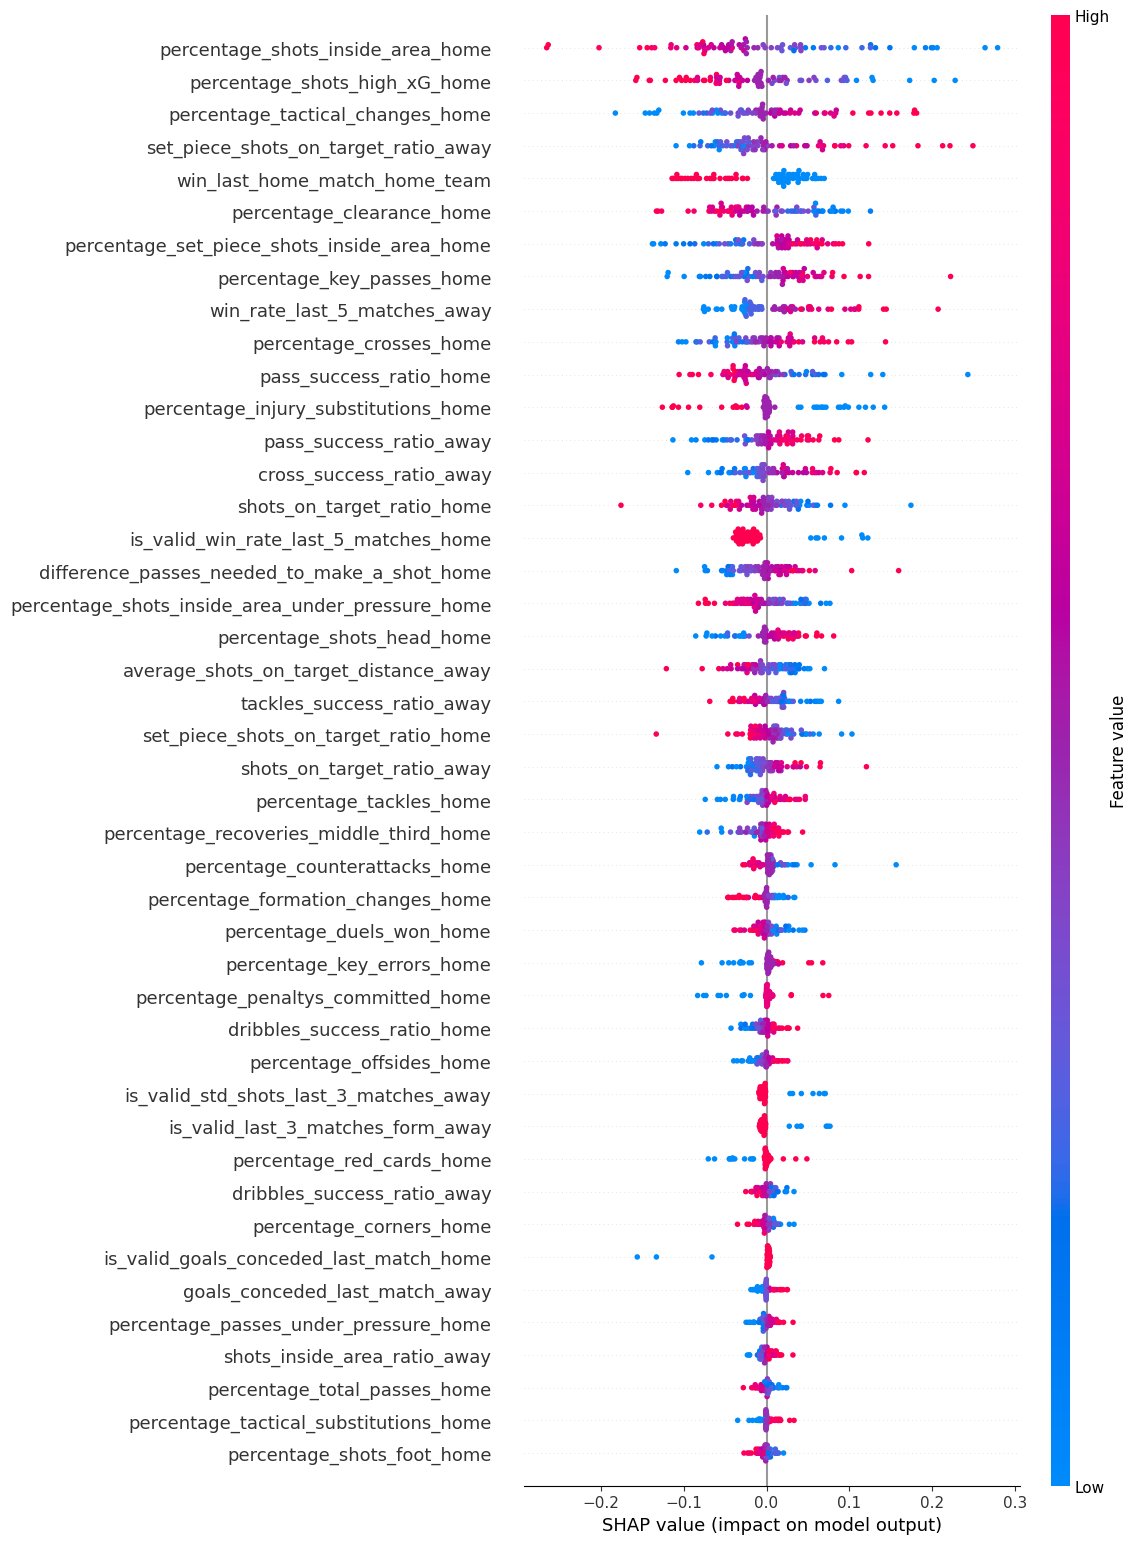

Class 1: draw
Important features (44):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'last_3_matches_form_away', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_std_shots_last_3_matches_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_p

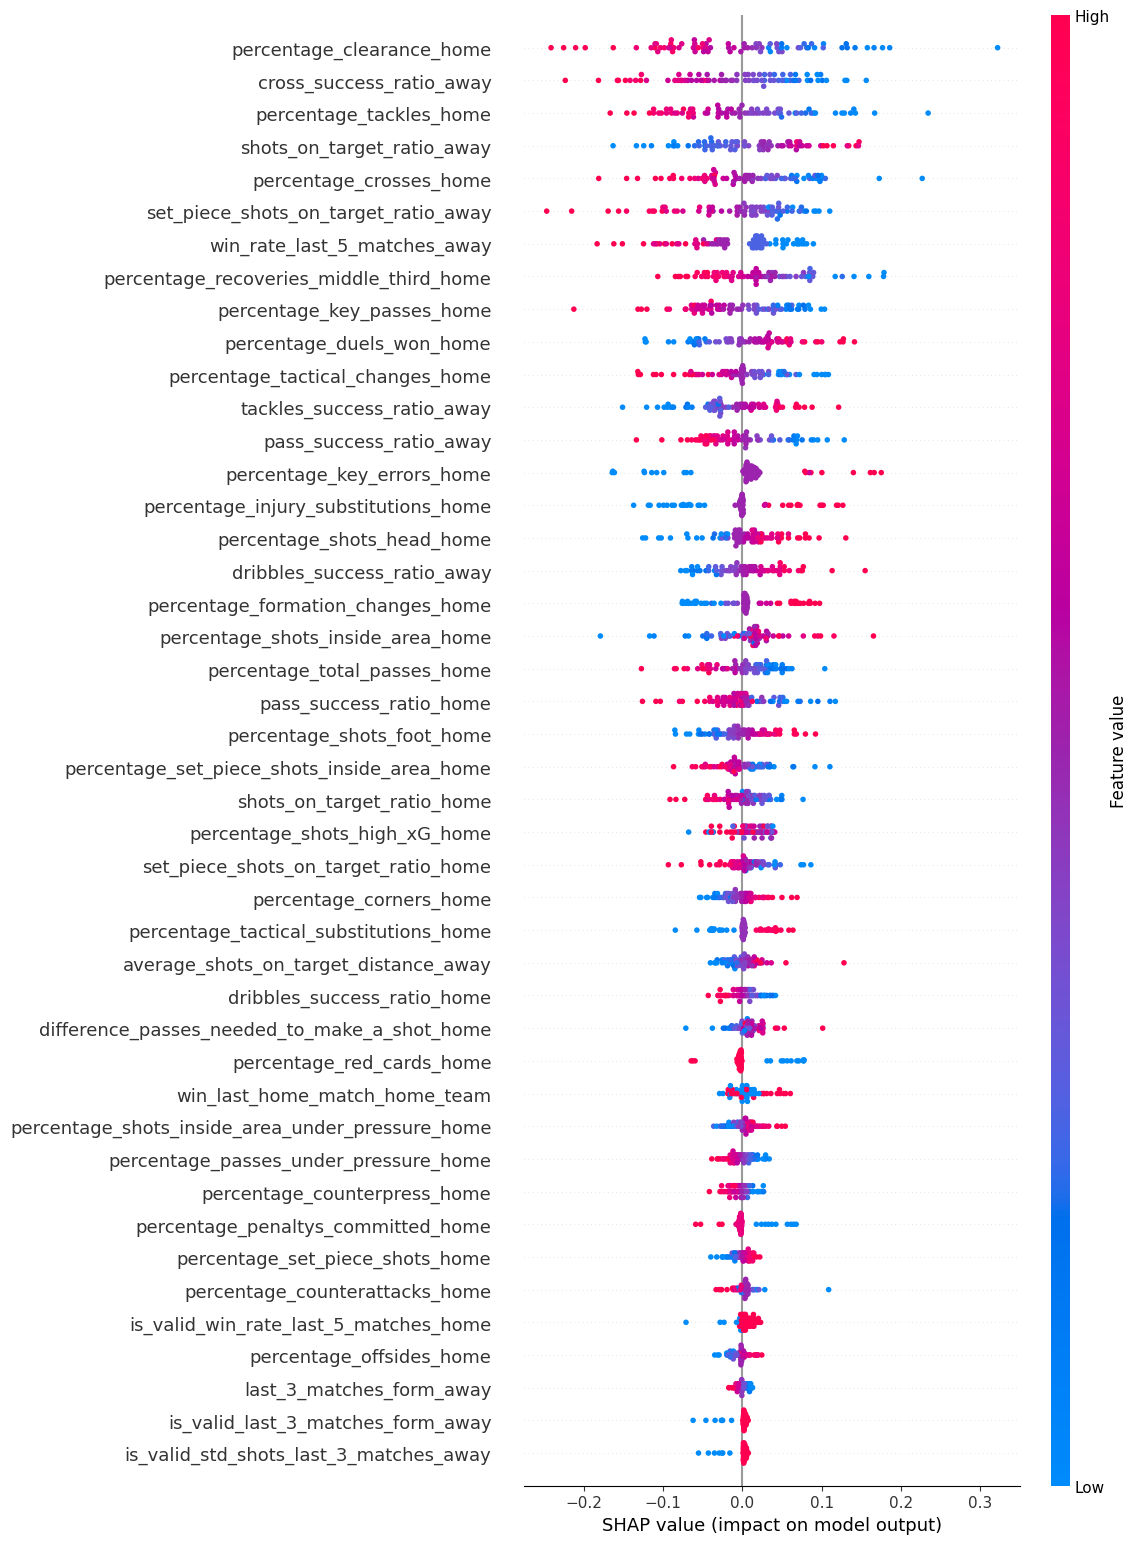

Class 2: home_team
Important features (43):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_away', 'dribbles_success_ratio_home', 'dribbles_success_ratio_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_total_passes_home', 'percentage_key_passes_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_crosses_home', 'percentage_corners_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_key_errors_home', 'percent

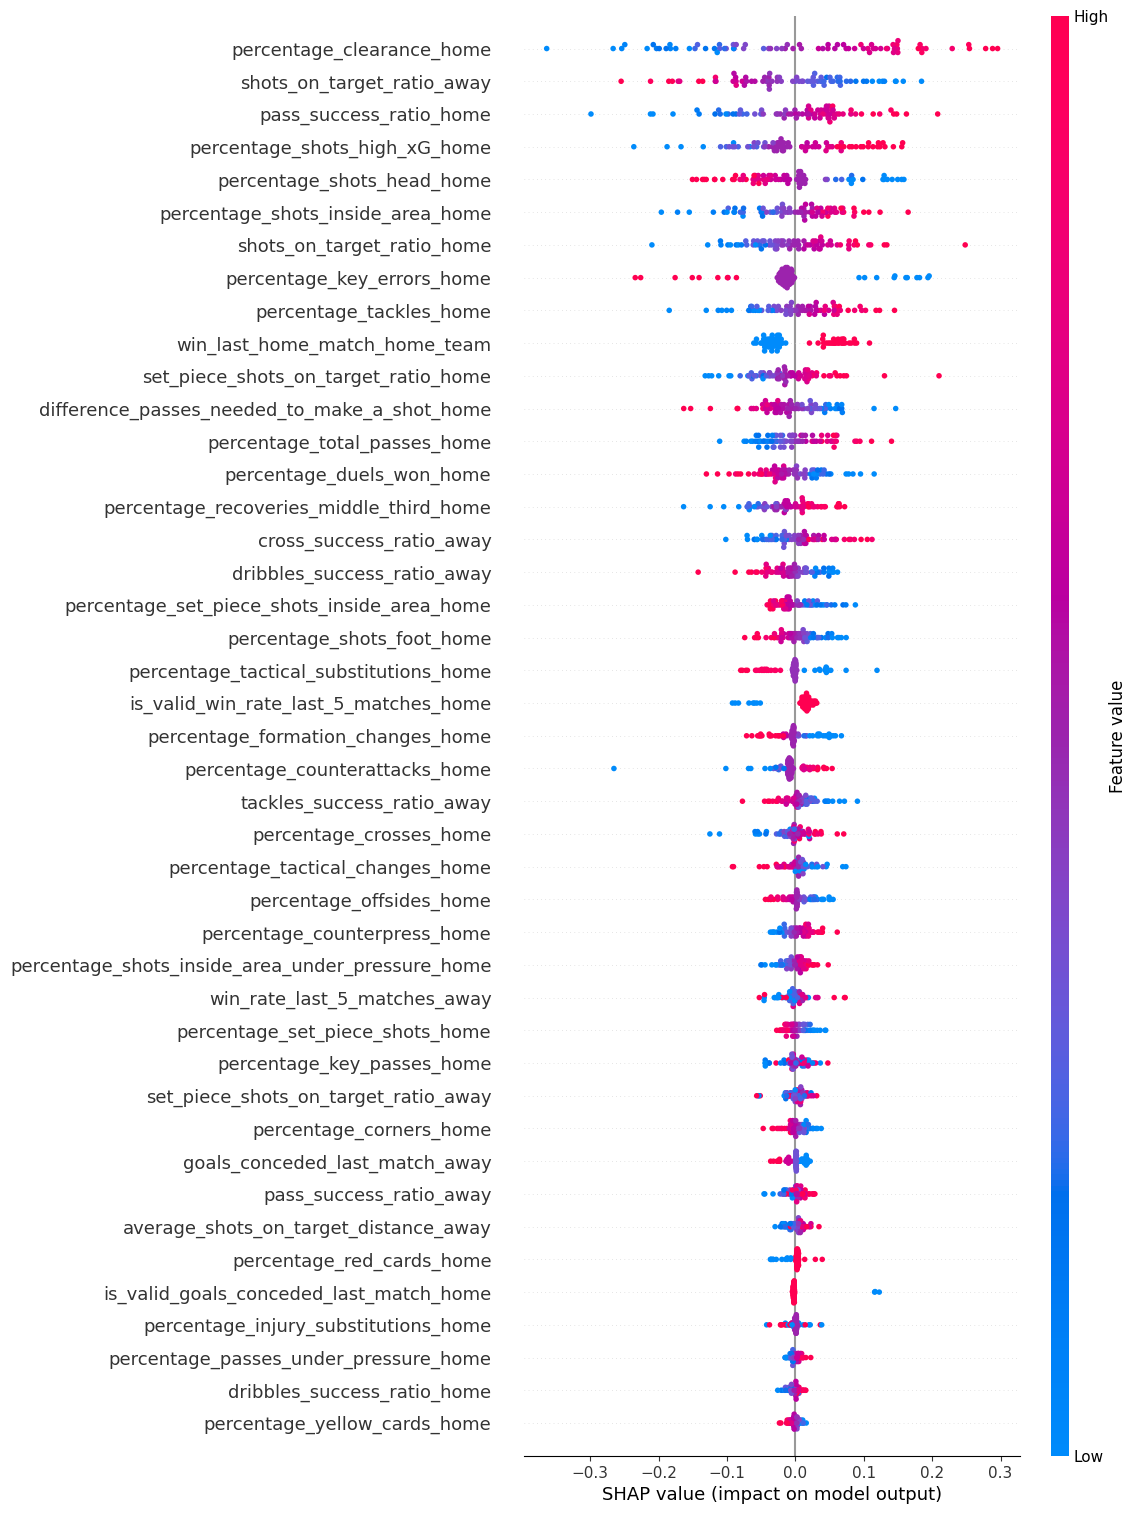

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_SerieA, feature_names_reduced_SerieA, encoder_SerieA)

Vamos a analizar cada uno de los gr치ficos:

- **Victoria del equipo visitante**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Serie A.
    - **Caracter칤sticas que favorecen la victoria del equipo visitante**: 游늳
        - `percentage_tactical_changes_home`: Un equipo local que necesita hacer muchos cambios t치cticos puede estar teniendo dificultades en el partido, lo que favorece al equipo visitante.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene precisi칩n en jugadas a bal칩n parado, aumenta sus probabilidades de anotar y ganar el partido.
        - `win_rate_last_5_matches_away`: Si el equipo visitante ha tenido una buena racha de resultados en sus 칰ltimos cinco partidos, es m치s probable que mantenga el impulso y logre una victoria fuera de casa.
        - `percentage_crosses_home`: Un alto n칰mero de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego a칠reo, lo que puede ser m치s predecible y menos efectivo contra una defensa bien organizada.
        - `pass_success_ratio_away`: Un alto porcentaje de precisi칩n en los pases del equipo visitante le permite mantener la posesi칩n y controlar el ritmo del partido.
        - `cross_success_ratio_away`: Si el equipo visitante tiene una buena precisi칩n en sus centros, puede generar m치s peligro ofensivo, especialmente en jugadas a칠reas.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases para generar un disparo, su ataque es menos directo y puede ser menos eficiente.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a칠reo, lo que puede ser m치s predecible y menos efectivo.
        - `shots_on_target_ratio_away`: Un equipo visitante que tiene un alto porcentaje de tiros a puerta es m치s eficiente en ataque, aumentando sus probabilidades de marcar y ganar el partido.
        - `percentage_key_errors_home`: Si el equipo local comete errores clave, el equipo visitante puede aprovecharlos para generar ocasiones de gol.
        - `percentage_penaltys_committed_home`: Si el equipo local comete m치s penaltis, otorga oportunidades claras al equipo visitante para marcar.
        - `percentage_red_cards_home`: Un equipo local que recibe m치s tarjetas rojas pierde jugadores y se debilita, favoreciendo al equipo visitante.
    - **Caracter칤sticas que no favorecen la victoria del equipo visitante**: 游늴
        - `percentage_shots_inside_area_home`: Un equipo local que dispara mucho desde dentro del 치rea genera m치s peligro, lo que puede complicar la victoria visitante.
        - `percentage_shots_high_xG_home`: Un equipo local que genera disparos con alta expectativa de gol (xG) es m치s probable que convierta sus oportunidades en goles, lo que dificulta la victoria del visitante.
        - `win_last_home_match_home_team`: Si el equipo local gan칩 su 칰ltimo partido en casa, podr칤a llegar con confianza y hacer m치s dif칤cil la victoria del visitante.
        - `percentage_clearance_home`: Si el equipo local despeja bien los balones en defensa, puede neutralizar los ataques del equipo visitante.
        - `pass_success_ratio_home`: Un equipo local con un alto porcentaje de precisi칩n en pases puede mantener la posesi칩n y dificultar el juego del equipo visitante.
        - `shots_on_target_ratio_home`: Si el equipo local tiene un alto porcentaje de tiros a puerta, est치 generando peligro y reduciendo las posibilidades de que el equipo visitante gane.
        - `percentage_shots_inside_area_under_pressure_home`: Si el equipo local logra finalizar jugadas incluso bajo presi칩n defensiva, tiene m치s probabilidades de marcar y ganar el partido.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen, ya que estos disparos suelen ser menos peligrosos.
        - `percentage_duels_won_home`: Un equipo local que gana m치s duelos puede controlar mejor el partido y reducir la efectividad del equipo visitante.
        - `percentage_formation_changes_home`: Si el equipo local realiza cambios t치cticos en la formaci칩n, puede ajustar su estrategia y contrarrestar al equipo visitante.
    - **Conclusi칩n**: Para que un equipo visitante logre la victoria en la Serie A, necesita ser eficiente en ataque, generar tiros a puerta de calidad y aprovechar las debilidades del equipo local. Tener 칠xito en jugadas a bal칩n parado y centros puede marcar la diferencia. Adem치s, un equipo visitante con una buena racha de partidos recientes tiene m치s posibilidades de imponerse. Por otro lado, si el equipo local genera muchas oportunidades de alta calidad, tiene 칠xito en la precisi칩n de pases y gana m치s duelos, la victoria visitante se vuelve m치s dif칤cil. Tambi칠n influyen factores como la disciplina del equipo local (tarjetas rojas y penaltis) y su capacidad para ajustar t치cticamente el partido.

- **Empate**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de empate en un partido en la Serie A. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Caracter칤sticas que favorecen el empate**: 游늳
        - `shots_on_target_ratio_away`: Un equipo visitante que tiene una gran efectividad en sus tiros a puerta aumenta sus posibilidades de anotar, aumentando las opciones de empate si el equipo local es superior en el juego.
        - `percentage_duels_won_home`: Si el equipo local gana muchos duelos, el partido se vuelve m치s disputado y menos fluido, lo que puede impedir que uno de los equipos se imponga con claridad.
        - `tackles_success_ratio_away`: Si el equipo visitante tiene un alto ratio del tackles hace que el partido se m치s disputado y menos fluido aumentando las posibilidades de empate.
        - `percentage_key_errors_home`: Si el equipo local comete varios errores esto puede hacer que el equipo visitante los aproveche y de esta manera pueda igualar el partido si el equipo local estaba por delante en el marcador.
        - `percentage_injuries_substitutions_home`: Si el equipo local tiene que hacer varios cambios por lesi칩n en comparaci칩n al visitante, si se ve칤a por debajo en el marcador esto puede hacer que cambies sus planes de juego y dar opciones al equipo visitante a empatar el partido.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a칠reo, lo que puede ser m치s predecible y menos efectivo, aumentando de esta manera la probabilidad de empate.
        - `dribbles_success_ratio_away`: Si el equipo visitante tiene una alta tasa de 칠xito en regates, le costar치 menos generar peligro en el 치rea rival, lo que favorece el empate.
        - `percentage_formation_changes_home`: Un equipo local que realiza cambios de formaci칩n puede estar buscando equilibrio en el partido en lugar de volcarse totalmente al ataque, lo que favorece un marcador cerrado.
        - `percentage_shots_inside_area_home`: Un equipo local que tiene tiros dentro del 치rea sin marcar indica dificultades para finalizar sus oportunidades, lo que favorece un resultado sin un ganador claro.
        - `percentage_tactical_substitutions_home`: Un equipo local que ajusta su t치ctica constantemente puede estar buscando mantener el equilibrio en el partido sin asumir demasiados riesgos.
        - `win_last_home_match_home_team`: Si el equipo local gan칩 su 칰ltimo partido en casa, puede mantener un nivel estable sin necesidad de arriesgar en exceso, favoreciendo el empate.
    - **Caracter칤sticas que no favorecen el empate**: 游늴
        - `percentage_clearance_home`: Si el equipo local consigue hacer varios despejes m치s que el equipo visitante puede indicar que el equipo local se esta defendiendo mejor y que puede ganar el partido.
        - `cross_success_ratio_away`: Si el equipo visitante tiene una buena precisi칩n en sus centros, puede generar m치s peligro ofensivo, especialmente en jugadas a칠reas; disminuyendo de esta manera las opciones de ganar del equipo local.
        - `percentage_tackles_home`: Un equipo local que hace m치s tackles que el equipo visitante puede indicar que esta frenando el ataque del equipo visitante mediante entradas, disminuyendo as칤 las opciones de que se de un empate en el partido.
        - `percentage_crosses_home`: Un alto n칰mero de centros del equipo local respecto al total del partido (ambos equipos) sugiere una dependencia del juego a칠reo, lo que puede ser m치s predecible y menos efectivo contra una defensa bien organizada.
        - `win_rate_last_5_matches_away`: Si el equipo visitante ha tenido una buena racha de resultados en sus 칰ltimos cinco partidos, es m치s probable que mantenga el impulso y logre una victoria fuera de casa.
        - `percentage_recoveries_middle_third_home`: Si equipo local consigue hacer m치s recuperaciones que el equipo visitante en el centro del campo, puede significar que no esta dejando tener el control del juego al equipo visitante y aumentando as칤 sus posibilidades de ganar.
        - `percentage_key_passes_home`: Un alto porcentaje de pases clave en el equipo local puede indicar que generan oportunidades, pero si no se concretan, podr칤a reflejar inefectividad ofensiva.
        - `percentage_tactical_changes_home`: Un mayor n칰mero de cambios t치cticos del equipo local sugiere inestabilidad en su planteamiento inicial, lo que favorece al visitante.
        - `pass_success_ratio_away`: Un alto porcentaje de precisi칩n en los pases del equipo visitante le permite mantener la posesi칩n y controlar el ritmo del partido.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta aumenta sus posibilidades de marcar, reduciendo la probabilidad de empate.
        - `set_piece_shots_on_target_ratio_home`: Un equipo local con precisi칩n en jugadas a bal칩n parado tiene m치s probabilidades de marcar y romper la igualdad.
        - `dribbles_success_ratio_home`: Un equipo local con una tasa alta de 칠xito en regates genera m치s peligro y tiene m치s opciones de ganar el partido.
        - `percentage_counterattacks_home`: Si el equipo local genera muchos contraataques efectivos, puede aprovechar los espacios y ganar el partido en lugar de mantener el empate.
        - `percentage_red_cards_home`: Un equipo local que recibe tarjetas rojas reduce su nivel competitivo y aumenta la posibilidad de que el equipo visitante gane.
        - `percentage_penaltys_committed_home`: Si el equipo local concede penaltis, otorga oportunidades claras al equipo visitante para marcar y ganar el partido.
        - `percentage_passes_under_pressure_home`: Un equipo local que mantiene la posesi칩n incluso bajo presi칩n puede controlar el partido y aumentar sus posibilidades de victoria.
    - **Conclusi칩n**: El empate en un partido de la Serie A se produce cuando ambos equipos logran equilibrar sus fortalezas ofensivas y defensivas, evitando que uno de ellos tome una ventaja decisiva. Factores como una distribuci칩n equitativa de los tiros a puerta, la solidez defensiva del equipo local y la efectividad del equipo visitante en situaciones de presi칩n favorecen un resultado igualado.
    El dominio de los duelos y una alta tasa de 칠xito en los tackles por parte de ambos equipos pueden hacer que el partido sea m치s disputado y menos fluido, reduciendo las oportunidades de que alguno de los dos logre imponerse con claridad. Asimismo, si el equipo local realiza cambios t치cticos para mantener el equilibrio en el partido, sin asumir demasiados riesgos ofensivos, la probabilidad de un empate aumenta.
    Sin embargo, el empate se vuelve menos probable cuando uno de los equipos demuestra mayor precisi칩n en jugadas a bal칩n parado, una mejor capacidad para generar ataques efectivos o un mayor 칠xito en regates. Un equipo local con un alto porcentaje de tiros a puerta y pases clave tiene m치s opciones de ganar el partido, mientras que un equipo visitante en buena forma reciente es m치s propenso a aprovechar cualquier debilidad del rival y romper la igualdad.

- **Victoria del equipo local**: Este gr치fico muestra las caracter칤sticas que favorecen o disminuyen la probabilidad de victoria del equipo local en la Serie A.
    - **Caracter칤sticas que favorecen la victoria del equipo local**: 游늳
        - `percentage_clearance_home`: Si el equipo local consigue hacer varios despejes m치s que el equipo visitante puede indicar que el equipo local es m치s oslido defensivamente aumentando as칤 sus opciones de ganar el partido.
        - `pass_success_ratio_home`: Un equipo local con una alta precisi칩n en los pases puede controlar mejor el partido y construir ataques m치s efectivos.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera m치s peligro y aumenta sus posibilidades de marcar y ganar el partido.
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto expected goals (xG), son m치s peligrosos y pueden traducirse en goles con mayor frecuencia.
        - `percentage_shots_inside_area_home`: Un equipo local que genera muchos tiros dentro del 치rea tiene m치s probabilidades de marcar, ya que estos disparos suelen ser m치s efectivos.
        - `percentage_tackles_home`: Un equipo local que hace m치s tackles que el equipo visitante puede indicar que esta frenando el ataque del equipo visitante mediante entradas, aumentando as칤 sus opciones de ganar el partido.
        - `win_last_home_match_home_team`: Un equipo que gan칩 su 칰ltimo partido en casa puede estar en un buen estado de confianza, lo que favorece su rendimiento en este partido.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local tiene una alta efectividad en tiros a puerta desde jugadas a bal칩n parado, incrementa sus opciones de victoria.
        - `percentage_recoveries_middle_third_home`: Si equipo local consigue hacer m치s recuperaciones que el equipo visitante en el centro del campo, puede significar que no esta dejando tener el control del juego al equipo visitante y aumentando as칤 sus posibilidades de ganar.
        - `percentage_counterattacks_home`: Un equipo local que genera m치s contraataques puede aprovechar los espacios dejados por el rival y aumentar sus posibilidades de marcar. 
    - **Caracter칤sticas que no favorecen la victoria del equipo local**: 游늴
        - `shots_on_target_ratio_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, puede generar m치s peligro y reducir las opciones de victoria del equipo local.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente del juego a칠reo, lo que podr칤a ser menos efectivo.
        - `percentage_key_errors_home`: Si el equipo local comete errores clave, el equipo visitante puede aprovecharlos para generar ocasiones de gol y complicar la victoria local.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m치s pases para generar un disparo, su ataque es menos eficiente y m치s predecible.
        - `percentage_duels_won_home`: Ganar m치s duelos en el partido por parte del equipo local puede hacer que el partido sea m치s igualado y tienda al empate.
        - `dribbles_success_ratio_away`: Un equipo visitante con una alta tasa de 칠xito en regates puede romper la defensa del equipo local y generar m치s ocasiones de gol.
        - `percentage_tactical_substitutions_home`, `percentage_formation_changes_home`, `percentages_tactical_changes_home`: Si el equipo local hace muchos cambios/sustituciones t치cticos puede deberse a que se est치n viendo sobrepasados en el marcador por el equipo contrario siendo m치s complicado que se lleven el partido.
        - `tackles_success_ratio_away`: Un equipo visitante con 칠xito en sus entradas defensivas puede recuperar el bal칩n con eficacia y frustrar los ataques del equipo local.
    - **Conclusi칩n**: La victoria del equipo local en la Serie A se ve impulsada por su capacidad para generar peligro en el 치rea rival, mantener la solidez defensiva y controlar el ritmo del partido. Un equipo local que es preciso en sus pases, realiza despejes efectivos y tiene una alta efectividad en tiros a puerta dentro del 치rea tiene m치s probabilidades de ganar. Adem치s, su 칠xito en jugadas a bal칩n parado y contraataques puede marcar la diferencia a su favor.
    Sin embargo, la victoria local se complica si el equipo visitante tiene una alta efectividad en sus tiros a puerta, es exitoso en regates y consigue frustrar los ataques locales con una defensa organizada. Errores clave del equipo local, un exceso de dependencia del juego a칠reo y la necesidad de realizar muchas modificaciones t치cticas pueden ser se침ales de debilidad que el equipo visitante podr칤a aprovechar.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: Para que un equipo visitante logre la victoria en la Serie A, es fundamental su eficiencia ofensiva y la capacidad de explotar las debilidades del equipo local. Factores como un alto porcentaje de tiros a puerta, una buena precisi칩n en centros, y el aprovechamiento de jugadas a bal칩n parado juegan un papel crucial en su 칠xito. Adem치s, si el equipo visitante tiene una buena racha de resultados recientes, su confianza y estado de forma pueden ser determinantes.
    Por otro lado, la victoria visitante se complica si el equipo local logra generar muchos tiros dentro del 치rea con alta expectativa de gol (xG), mantiene una buena precisi칩n en pases, y consigue neutralizar los ataques visitantes con despejes efectivos y solidez defensiva. Adem치s, si el equipo local controla el ritmo del partido y realiza ajustes t치cticos efectivos, puede reducir significativamente las posibilidades de victoria del equipo visitante.
    - *Empate*: El empate suele ocurrir cuando ning칰n equipo logra imponerse de manera clara, ya sea porque ambos muestran un buen equilibrio entre ataque y defensa, o porque el partido se vuelve disputado y trabado. Factores como una alta cantidad de duelos ganados, una gran efectividad en tackles, y la capacidad del equipo visitante para generar peligro sin imponerse completamente favorecen un resultado igualado.
    Sin embargo, el empate se vuelve menos probable cuando uno de los equipos domina en jugadas a bal칩n parado, tiene 칠xito en regates o genera un alto n칰mero de tiros efectivos. Un equipo local con una alta precisi칩n en pases clave y una buena organizaci칩n t치ctica tiene m치s opciones de romper la igualdad. Adem치s, si el equipo visitante llega con una racha positiva y mantiene un alto porcentaje de posesi칩n, la posibilidad de que se lleve la victoria aumenta.
    - *Victoria del equipo local*: La victoria del equipo local se ve impulsada por su capacidad para generar peligro en el 치rea rival, mantener la solidez defensiva y controlar el ritmo del partido. Un equipo local con una alta precisi칩n en los pases, eficiencia en tiros a puerta y 칠xito en despejes defensivos tiene m치s probabilidades de imponerse. Adem치s, la capacidad de realizar contraataques efectivos y aprovechar las jugadas a bal칩n parado puede marcar la diferencia en su favor.
    No obstante, la victoria local se ve amenazada si el equipo visitante muestra una alta efectividad en sus tiros, rompe l칤neas defensivas con 칠xito en regates, y consigue desorganizar la defensa local mediante centros precisos y jugadas elaboradas. Errores clave del equipo local, un exceso de dependencia del juego a칠reo y la necesidad de hacer m칰ltiples ajustes t치cticos pueden ser se침ales de inestabilidad que favorecen al equipo visitante.
    - *Factores no determinantes*: Algunos factores parecen tener un impacto limitado en la definici칩n del resultado. Aspectos como la cantidad de tarjetas amarillas, ciertos cambios t치cticos espec칤ficos y la presi칩n defensiva en la zona de pases no parecen influir significativamente en la victoria de un equipo o en la probabilidad de empate. Adem치s, si bien la forma reciente de los equipos puede ser un indicador relevante, no siempre es determinante en el desarrollo del partido, ya que otros factores contextuales pueden influir en el rendimiento de cada equipo.